# Innoscripta Pre-selection Round

## Problem Statement

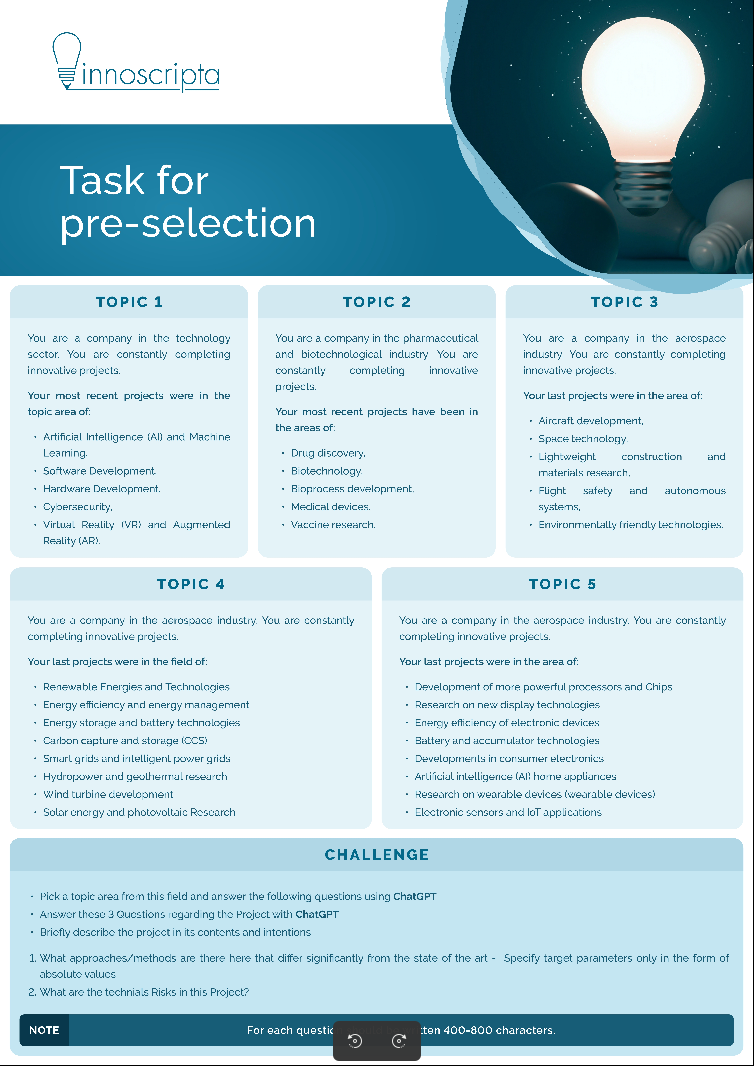

## Topic Used for Solution

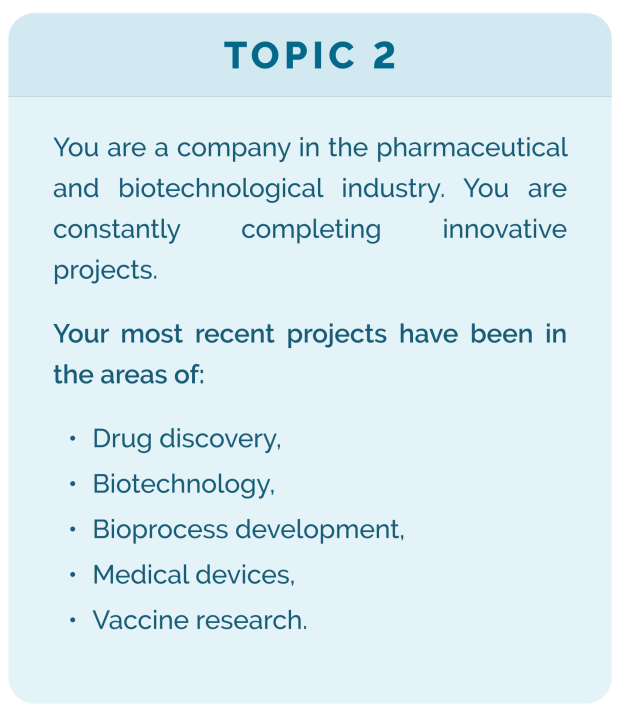

## Solution Methodology

## Proposed Solution

In [ ]:
!pip install openai
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.6 MB/s eta 0:00:00


In [ ]:
import os
import openai

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

ModuleNotFoundError: ignored

In [ ]:
#For managing text-wrapping
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
#defining GPT function
def get_completion_new(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0,
    )
    return response.choices[0].message["content"]

In [ ]:
Company_domain = "pharmaceutical and biotechnology"
Prompt_header = f"""
You are a project manager in the company involved in {Company_domain} field
the last projects delivered by your organization were in following domains:
"""
Past_Project_Context = """
- Drug Discovery
- Biotechnology
- Bioprocess Development
- Medical Devices
- Vaccine Research
"""
Feedback_recommendations = """
1. Provide more specific details about the proposed novel drug delivery system, such as the specific nanotechnology-based approach being used.
2. Include information about the research team or organization involved in the project to establish credibility.
3. Provide references or citations to support the claims made in the text, such as studies or research papers on the limitations of current drug delivery methods and the potential benefits of nanotechnology-based systems.
4. Include a timeline or milestones for the project to give a better understanding of the progress and potential challenges ahead.
"""

Prompt_footer = f"""
As the project manager of the above company, create a valid project that your company may undertake and answer the following questions.
Question 1:	Briefly describe your project in its contents and intentions.
Question 2:	What approaches/methods are there that differ significantly from the state of the art - Specify target parameters only in the form of absolute values?
Question 3:	Also tell what are the technical risks in this project?

Use the following recommendations to improve your answers
{Feedback_recommendations}
"""
Format_instructions = """
Format Solution following these guidelines:
<Name of the project>

<Question 1>
<Solution 1>

<Question 2>
<Solution 2>

<Question 3>
<Solution 3>
"""


prompt = f"""
{Prompt_header}
{Past_Project_Context}
{Prompt_footer}
{Format_instructions}
"""
print("Prompt Used")
print(prompt)
print('*'*100)
response = get_completion_new(prompt)

print(response)


Prompt Used


You are a project manager in the company involved in pharmaceutical and biotechnology field
the last projects delivered by your organization were in following domains:


- Drug Discovery
- Biotechnology
- Bioprocess Development
- Medical Devices
- Vaccine Research


As the project manager of the above company, create a valid project that your company may undertake and answer the following questions.
Question 1:	Briefly describe your project in its contents and intentions.
Question 2:	What approaches/methods are there that differ significantly from the state of the art - Specify target parameters only in the form of absolute values? 
Question 3:	Also tell what are the technical risks in this project?

Use the following recommendations to improve your answers  

1. Provide more specific details about the proposed novel drug delivery system, such as the specific nanotechnology-based approach being used.
2. Include information about the research team or organization involved 

## Validating Responses Generated By AI via Feedback loop

In [ ]:
Feedback_prompt_header = """
Analyze the following text and try to acertain whether it is true,
Give it a truth score out of 100
Enlist the reasons for your score
Also enlist recommendations to improve the score
"""

Target_output = response

Format_instructions = """
Format Solution following these guidelines:
<Truth Score out of 100>

<Reasons for the score>

<Suggested improvements>
"""

Feedback_prompt = f"""
{Feedback_prompt_header}
{Target_output}
{Format_instructions}
"""
print("Prompt Used")
print(Feedback_prompt)
print('*'*100)

feedback_response = get_completion_new(Feedback_prompt)

print(feedback_response)

Prompt Used


Analyze the following text and try to acertain whether it is true,
Give it a truth score out of 100
Enlist the reasons for your score
Also enlist recommendations to improve the score

Project: Development of a Nanotechnology-based Drug Delivery System for Targeted Cancer Therapy

Question 1: Briefly describe your project in its contents and intentions.
The project aims to develop a novel drug delivery system using nanotechnology for targeted cancer therapy. The current drug delivery methods have limitations in terms of specificity and efficacy, leading to side effects and suboptimal treatment outcomes. By utilizing nanotechnology, we intend to enhance the delivery of anticancer drugs directly to tumor cells, minimizing damage to healthy tissues and improving treatment efficacy.

Question 2: What approaches/methods are there that differ significantly from the state of the art - Specify target parameters only in the form of absolute values?
The nanotechnology-based drug del

Using a response from this block we update our input block and improve the orignal prompt iteratively

## Final Solution

After several rounds of prompting the final soution is

In [ ]:
print(response)

Project: Development of a Nanotechnology-based Drug Delivery System for Targeted Cancer Therapy

Question 1: Briefly describe your project in its contents and intentions.
The project aims to develop a novel drug delivery system using nanotechnology for targeted cancer therapy. The current drug delivery methods have limitations in terms of specificity and efficacy, leading to side effects and suboptimal treatment outcomes. By utilizing nanotechnology, we intend to enhance the delivery of anticancer drugs directly to tumor cells, minimizing damage to healthy tissues and improving treatment efficacy.

Question 2: What approaches/methods are there that differ significantly from the state of the art - Specify target parameters only in the form of absolute values?
The nanotechnology-based drug delivery system will utilize targeted nanoparticles loaded with anticancer drugs. These nanoparticles will be designed to have a size range of 50-100 nanometers, allowing for efficient circulation in t

# Innoscripta POC

In [ ]:
!pip install langchain==0.0.208 deeplake openai tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.3/538.3 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 16.4 MB/s eta 0:00:0

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
import pandas as pd
import numpy as np
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import DeepLake
from langchain.text_splitter import CharacterTextSplitter
from langchain import OpenAI
from langchain.docstore.document import Document
from langchain import PromptTemplate
from langchain.prompts import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate
)

In [ ]:
transcript_df = pd.read_excel("/content/drive/MyDrive/Innoscripta/transcript.xlsx")
transcript_df.head()

,time,german_text,english_text
0,00:00:00,"Ich würde Sie am Anfang bitten, dass Sie mir e...",I would like to start by asking you to give me...
1,00:00:15,"Wichtig ist aber immer, dass die gesamte Proje...",But it's always important that the entire proj...
2,00:00:30,einzuordnen. Da würde ich auf jeden Fall den S...,. I would definitely take the starting point o...
3,00:00:45,hatten das mit Fördermitteln gefördert wurde u...,that was funded with subsidies and Annalena di...
4,00:01:00,machen jetzt von der laufzeit keine ahnung gib...,"Now I don't know anything about the runtime, i..."


## Character Text Splitter

In [ ]:
from langchain.document_loaders import TextLoader
loader = TextLoader('/content/drive/MyDrive/Innoscripta/fulltranscript_eng.txt')
documents = loader.load_and_split()

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(chunk_size=50, chunk_overlap=10)
simple_texts = text_splitter.split_documents(documents)

print (f"You have {len(simple_texts)} documents")

print ("Preview:")
print (simple_texts[0].page_content)

You have 12 documents
Preview:
I would like to start by asking you to give me a brief overview of the running time. The research allowance has been in place since 2020, which means that retrospective development content can also be attached. What's important is  But it's always important that the entire project duration is staked out. This means that if, for example, it started in 2021, but still extends into the future, that you also cover the entire project duration up to the productive stage. How about XSL Cat . I would definitely take the starting point of January 1, 2023. Annalena, yes, that's in your interest and Alex also because we had a project before  that was funded with subsidies and Annalena did a lot and they are kind of it, it's kind of one-to-one, now after this project from January then turned into XXL cat. That's how I would do it.  Now I don't know anything about the runtime, is there anything that's good, should you take it time, should you do it quickly, should you

In [ ]:
# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "parthtripathidummy"
my_activeloop_dataset_name = "innoscripta_simple_text_eng_new"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_simple = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

# add documents to our Deep Lake dataset
db_simple.add_documents(simple_texts)

Your Deep Lake dataset has been successfully created!


|

Dataset(path='hub://parthtripathidummy/innoscripta_simple_text_eng_new', tensors=['embedding', 'id', 'metadata', 'text'])

  tensor      htype      shape      dtype  compression
  -------    -------    -------    -------  ------- 
 embedding  embedding  (12, 1536)  float32   None   
    id        text      (12, 1)      str     None   
 metadata     json      (12, 1)      str     None   
   text       text      (12, 1)      str     None   


['0ce27626-40ad-11ee-ae91-0242ac1c000c',
 '0ce277e8-40ad-11ee-ae91-0242ac1c000c',
 '0ce27874-40ad-11ee-ae91-0242ac1c000c',
 '0ce278ec-40ad-11ee-ae91-0242ac1c000c',
 '0ce2795a-40ad-11ee-ae91-0242ac1c000c',
 '0ce279be-40ad-11ee-ae91-0242ac1c000c',
 '0ce27a2c-40ad-11ee-ae91-0242ac1c000c',
 '0ce27b12-40ad-11ee-ae91-0242ac1c000c',
 '0ce27bc6-40ad-11ee-ae91-0242ac1c000c',
 '0ce27c70-40ad-11ee-ae91-0242ac1c000c',
 '0ce27cde-40ad-11ee-ae91-0242ac1c000c',
 '0ce27d42-40ad-11ee-ae91-0242ac1c000c']

In [ ]:
# let's see the top relevant documents to a specific query
query = "What is this research about"
# query = 'what is a nft'
docs = db_simple.similarity_search(query)
print(docs[0].page_content)

supposed to work on it? Yes, so we'll do it again via the HR department. Basically,  I'm going to have a relatively long number of hours there. Then a veterinarian from clinical chemistry has hours there and of course we still need laboratory and I think there will be a second veterinarian either from my department or from clinical chemistry  so that he can have contact with the veterinarians outside. All right, then just a rough overview, that is, four people to no idea ten to 15 percent perhaps. Yes, that's right.  Okay, are any subcontracts still coming in here? So there will certainly be cooperations, but more with universities and then you don't really have any bills. So if you don't pay for the university, then that's not relevant. Yes yes exactly.  yes, exactly, I'm just thinking so loudly. That's why I don't think so at the moment. Okay perfect, then I'm already through with my questions here too. Is there another project or would that be it for now?  I think that's it for now.

In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

{chunks_formatted}

Answer to the following question from a user. Use only information from the previous context information. Do not invent stuff.

Question: {query}

Answer:"""

prompt = PromptTemplate(
    input_variables=["chunks_formatted", "query"],
    template=template,
    )

In [ ]:
# the full pipeline

# user question
query = "What is this resarch about"

# retrieve relevant chunks
docs = db_simple.similarity_search(query)
retrieved_chunks = [doc.page_content for doc in docs]

# format the prompt
chunks_formatted = "\n\n".join(retrieved_chunks)
prompt_formatted = prompt.format(chunks_formatted=chunks_formatted, query=query)

# generate answer
llm = OpenAI(model="text-davinci-003", temperature=0)
answer = llm(prompt_formatted)
print(answer)

 This research is about developing products for dogs, cats and horses that give customers, breeders, veterinarians and private individuals the opportunity to evaluate the genetic health of their own animal in its entirety, sometimes beyond what is already known for the individual breeds, and on the other hand to promote animal health in the future. The project goal is to expand the current state of the art technology by using Next Generation Sequencing to study all the genetic markers of an animal and to develop products that contain all hereditary diseases in the species and traits that can be mapped with the technology.


In [ ]:
type(simple_texts[0])

langchain.schema.Document

## SPACY Splitter

In [ ]:
# Load a long document
with open('/content/drive/MyDrive/Innoscripta/fulltranscript_eng.txt', encoding= 'unicode_escape') as f:
    sample_text = f.read()

from langchain.text_splitter import SpacyTextSplitter
# Instantiate the SpacyTextSplitter with the desired chunk size
text_splitter = SpacyTextSplitter(chunk_size=2500, chunk_overlap=200)


# Split the text using SpacyTextSplitter
spacy_texts = text_splitter.split_text(sample_text)
print (f"You have {len(spacy_texts)} documents")

print ("Preview:")
# Print the first chunk
print(spacy_texts[0])

You have 21 documents
Preview:
I would like to start by asking you to give me a brief overview of the running time.

The research allowance has been in place since 2020, which means that retrospective development content can also be attached.

What's important is  

But it's always important that the entire project duration is staked out.

This means that if, for example, it started in 2021, but still extends into the future, that you also cover the entire project duration up to the productive stage.

How about XSL Cat .

I would definitely take the starting point of January 1, 2023.

Annalena, yes, that's in your interest and Alex also because we had a project before  that was funded with subsidies and Annalena did a lot

and they are kind of it, it's kind of one-to-one, now after this project from January then turned into XXL cat.

That's how I would do it.  

Now I don't know anything about the runtime, is there anything that's good, should you take it time, should you do it quickly

In [ ]:
# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "parthtripathidummy"
my_activeloop_dataset_name = "innoscripta_spacy_text_eng_new2"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_spacy = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

#convert to langchain object
spacy_texts = [Document(page_content=ele, metadata={"source": "local"}) for ele in spacy_texts]

# # add documents to our Deep Lake dataset
db_spacy.add_documents(spacy_texts)

Your Deep Lake dataset has been successfully created!


\

Dataset(path='hub://parthtripathidummy/innoscripta_spacy_text_eng_new2', tensors=['embedding', 'id', 'metadata', 'text'])

  tensor      htype      shape      dtype  compression
  -------    -------    -------    -------  ------- 
 embedding  embedding  (21, 1536)  float32   None   
    id        text      (21, 1)      str     None   
 metadata     json      (21, 1)      str     None   
   text       text      (21, 1)      str     None   


['6c12fd22-40b8-11ee-ae91-0242ac1c000c',
 '6c12fea8-40b8-11ee-ae91-0242ac1c000c',
 '6c12ff2a-40b8-11ee-ae91-0242ac1c000c',
 '6c12ff98-40b8-11ee-ae91-0242ac1c000c',
 '6c130006-40b8-11ee-ae91-0242ac1c000c',
 '6c13006a-40b8-11ee-ae91-0242ac1c000c',
 '6c1300ce-40b8-11ee-ae91-0242ac1c000c',
 '6c130128-40b8-11ee-ae91-0242ac1c000c',
 '6c13018c-40b8-11ee-ae91-0242ac1c000c',
 '6c1301e6-40b8-11ee-ae91-0242ac1c000c',
 '6c13024a-40b8-11ee-ae91-0242ac1c000c',
 '6c1302a4-40b8-11ee-ae91-0242ac1c000c',
 '6c1302fe-40b8-11ee-ae91-0242ac1c000c',
 '6c130358-40b8-11ee-ae91-0242ac1c000c',
 '6c1303bc-40b8-11ee-ae91-0242ac1c000c',
 '6c130416-40b8-11ee-ae91-0242ac1c000c',
 '6c1304c0-40b8-11ee-ae91-0242ac1c000c',
 '6c130524-40b8-11ee-ae91-0242ac1c000c',
 '6c13057e-40b8-11ee-ae91-0242ac1c000c',
 '6c1305e2-40b8-11ee-ae91-0242ac1c000c',
 '6c13063c-40b8-11ee-ae91-0242ac1c000c']

In [ ]:
# let's see the top relevant documents to a specific query
query = "What is this research about"
# query = 'what is a nft'
docs = db_spacy.similarity_search(query)
print(docs[0].page_content)

23, 24, 25, Annalena, I mean I don't care.

He's in his late 26s.

Then we have a big project with four years, where you write hours  

yes, I think so too.

There will always be something to readjust or something like that, even if it works, then there will be new tests or something else to optimize.

So I think there will be a need at the beginning.

Yes, yes.

All right.

We have to be able to present this as  We have to be able to present this as the most methodical approach possible.

This means that a methodology is developed in practice, using the example of cats, and that this can then also be transferred to dogs and horses.  

Ideally, this also means a methodical approach to transferring it to other species, so that you can ideally demonstrate here that, i.e. the funding is there for the prototype, that practically paves the way, just using the example of cat,  cat dog horse or it could in principle be transferred to other animal species afterwards.

That's how they want to w

In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

{chunks_formatted}

GIve elaborative Answer to the following question from a user. Use only information from the previous context information. Do not invent stuff.

Question: {query}

Answer:"""

prompt = PromptTemplate(
    input_variables=["chunks_formatted", "query"],
    template=template,
    )

In [ ]:
# the full pipeline

# user question
query = "What is this resarch about"

# retrieve relevant chunks
docs = db_spacy.similarity_search(query)
retrieved_chunks = [doc.page_content for doc in docs]

# format the prompt
chunks_formatted = "\n\n".join(retrieved_chunks)
prompt_formatted = prompt.format(chunks_formatted=chunks_formatted, query=query)

# generate answer
llm = OpenAI(model="text-davinci-003", temperature=0)
answer = llm(prompt_formatted)
print(answer)

 This research is about developing a method to detect Leishmania in animal samples, such as blood, swabs, or hair, and to identify any resistance genes present in the Leishmania. This will enable veterinarians to quickly and accurately determine the best treatment for the animal, as well as to prevent the development of more resistant Leishmania. The research involves using classical PCA or real-time PCA to detect Leishmania, and using NGS to identify resistance genes. The end result will be a test kit or an application that will allow customers to analyze their animals and compare them to others.


In [ ]:
import deeplake
ds = deeplake.load('hub://parthtripathidummy/innoscripta_spacy_text_eng_new')

/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/parthtripathidummy/innoscripta_spacy_text_eng_new



-

hub://parthtripathidummy/innoscripta_spacy_text_eng_new loaded successfully.



In [ ]:
dir(ds)

['__args__',
 '__bool__',
 '__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__origin__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__result__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__tuple_params__',
 '__type__',
 '__union_params__',
 '__values__',
 '__weakref__',
 '_all_tensors_filtered',
 '_append_or_extend',
 '_append_to_queries_json',
 '_checkout',
 '_checkout_hooks',
 '_client',
 '_commit',
 '_commit_hooks',
 '_copy',
 '_create_downsampled_tensor',
 '_create_group',
 '_create_sample_id_tensor',
 '_create_sample_info_tensor',
 '_create_sample_shape_tensor',
 '_create_tensor',
 '_dataset_diff',
 

# Working on Long Summary Data

In [ ]:
from langchain.document_loaders import TextLoader
loader = TextLoader('/content/drive/MyDrive/Innoscripta/full_summary_text.txt')
documents = loader.load_and_split()

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(chunk_size=50, chunk_overlap=10)
simple_texts = text_splitter.split_documents(documents)

print (f"You have {len(simple_texts)} documents")

print ("Preview:")
print (simple_texts[0].page_content)

You have 5 documents
Preview:
FULL Long Summary === ===
In this conversation, the speaker seeks a brief overview of the running time and emphasizes the significance of encompassing the entire project duration. They propose classifying the project under XSL cat and setting the starting point as January 1, 2023. The speaker suggests a project duration of three to four years, considering one year to be insufficient. They mention involving the customer in the process. Furthermore, they discuss the idea of transferring knowledge from previous projects, comparing it to baking cakes. The speaker acknowledges the need for adjustments and optimizations, even if the project progresses smoothly. They anticipate the need for ongoing improvements and foresee a project timeline extending until at least the middle of 2026. Overall, the speaker emphasizes the importance of thorough planning and continuous refinement in order to successfully complete the project within the desired timeframe.
The projec

In [ ]:
# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "parthtripathidummy"
my_activeloop_dataset_name = "innoscripta_summary_text_eng_new"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_simple = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

# add documents to our Deep Lake dataset
db_simple.add_documents(simple_texts)

Your Deep Lake dataset has been successfully created!


-

Dataset(path='hub://parthtripathidummy/innoscripta_summary_text_eng_new', tensors=['embedding', 'id', 'metadata', 'text'])

  tensor      htype      shape     dtype  compression
  -------    -------    -------   -------  ------- 
 embedding  embedding  (5, 1536)  float32   None   
    id        text      (5, 1)      str     None   
 metadata     json      (5, 1)      str     None   
   text       text      (5, 1)      str     None   


['76010b4e-40ef-11ee-bd13-0242ac1c000c',
 '76010d56-40ef-11ee-bd13-0242ac1c000c',
 '76010e28-40ef-11ee-bd13-0242ac1c000c',
 '76010ee6-40ef-11ee-bd13-0242ac1c000c',
 '76010fa4-40ef-11ee-bd13-0242ac1c000c']

In [ ]:
# let's see the top relevant documents to a specific query
query = "What is this research about"
# query = 'what is a nft'
docs = db_simple.similarity_search(query)
print(docs[0].page_content)

FULL Long Summary === ===
In this conversation, the speaker seeks a brief overview of the running time and emphasizes the significance of encompassing the entire project duration. They propose classifying the project under XSL cat and setting the starting point as January 1, 2023. The speaker suggests a project duration of three to four years, considering one year to be insufficient. They mention involving the customer in the process. Furthermore, they discuss the idea of transferring knowledge from previous projects, comparing it to baking cakes. The speaker acknowledges the need for adjustments and optimizations, even if the project progresses smoothly. They anticipate the need for ongoing improvements and foresee a project timeline extending until at least the middle of 2026. Overall, the speaker emphasizes the importance of thorough planning and continuous refinement in order to successfully complete the project within the desired timeframe.
The project aims to develop genetic heal

In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

{chunks_formatted}

Answer to the following question from a user. Use only information from the previous context information. Do not invent stuff.

Question: {query}

Answer:"""

prompt = PromptTemplate(
    input_variables=["chunks_formatted", "query"],
    template=template,
    )

In [ ]:
# the full pipeline

# user question
query = "What is this research about"

# retrieve relevant chunks
docs = db_simple.similarity_search(query)
retrieved_chunks = [doc.page_content for doc in docs]

# format the prompt
chunks_formatted = "\n\n".join(retrieved_chunks)
prompt_formatted = prompt.format(chunks_formatted=chunks_formatted, query=query)

# generate answer
llm = OpenAI(model="text-davinci-003", temperature=0)
answer = llm(prompt_formatted)
print(answer)

 This research is about developing genetic health evaluation products for dogs, cats, and horses. It involves using Next Generation Sequencing technology to study the entire genetic makeup of animals and detect hereditary diseases. The goal is to provide customers, breeders, veterinarians, and individuals with the means to evaluate the genetic health of their animals comprehensively.


Objective of the project (if
applicable, in the context of the
cooperative project)
Motivation, objectives, and intended results. To what extent does the project
aim to expand the state of knowledge/technology or utilize existing
scientific, technical, economic, or other relevant findings or approaches
1 State of the art (Currently/According to the state of the art...
1 Project objective (The goal of the project is...
1 Differentiation from the state of the art (The state of the art is expanded
in terms of..., thereby expanding the knowledge about...
1 Project result (The planned outcome/result is...)



In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

{chunks_formatted}

Answer to the following question from a user. Use only information from the previous context information following the guidelines provided. Do not invent stuff.

Question: {query}
Guidelines: {guidelines}
Answer:"""

prompt = PromptTemplate(
    input_variables=["chunks_formatted", "query", "guidelines"],
    template=template,
    )

In [ ]:
# the full pipeline

# user question
query = "What is the Objective of the project (if applicable, in the context of the cooperative project) "
guidelines = '''
Motivation, objectives, and intended results. To what extent does the project
aim to expand the state of knowledge/technology or utilize existing
scientific, technical, economic, or other relevant findings or approaches
 - 1 State of the art (Currently/According to the state of the art...
 - 1 Project objective (The goal of the project is...
 - 1 Differentiation from the state of the art (The state of the art is expanded
   in terms of..., thereby expanding the knowledge about...
 - 1 Project result (The planned outcome/result is...)

Please ensure that the project uses specific technical terminology to
describe the innovative core. This is particularly crucial, especially for
software projects.
'''
# retrieve relevant chunks
docs = db_simple.similarity_search(query)
retrieved_chunks = [doc.page_content for doc in docs]

# format the prompt
chunks_formatted = "\n\n".join(retrieved_chunks)
prompt_formatted = prompt.format(chunks_formatted=chunks_formatted, query=query, guidelines=guidelines)

# generate answer
llm = OpenAI(model="text-davinci-003", temperature=0)
answer = llm(prompt_formatted)
print(answer)

 The objective of the project is to develop genetic health evaluation products for dogs, cats, and horses. The methodology involves starting with cats as an example and then transferring the approach to other species. The goal is to demonstrate that the prototype, developed for cats, can be applied to other animal species as well. The project aims to go beyond the current state of the art by utilizing high-throughput technology, specifically Next Generation Sequencing, to study the entire genetic makeup of animals. The main focus is on detecting hereditary diseases in cats, dogs, and horses. By expanding the use of next-generation sequencing, the project aims to cover a large portion of the known diseases in each species. The goal is to develop a product for each species that contains an additive XXL, capable of detecting and mapping all or most hereditary diseases and characteristics that can be identified using the technology. The project aims to continuously cover more than 60 perce

In [ ]:
len(answer)

1114

# Working on Short Summary Data

In [ ]:
from langchain.document_loaders import TextLoader
loader = TextLoader('/content/drive/MyDrive/Innoscripta/short_summary_text.txt')
documents = loader.load_and_split()

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(chunk_size=50, chunk_overlap=10)
simple_texts = text_splitter.split_documents(documents)

print (f"You have {len(simple_texts)} documents")

print ("Preview:")
print (simple_texts[0].page_content)

You have 2 documents
Preview:
Short Summary === ===
The speaker is asking for an overview of the running time and discussing the importance of covering the entire project duration. They suggest classifying it under XSL cat and starting from January 1, 2023. They recommend a project duration of three to four years and mention involving the customer. They also mention learning from previous projects and the need for adjustments and optimizations.
The goal of the project is to develop genetic health evaluation products for dogs, cats, and horses. These products will allow customers to assess the overall genetic health of their animals and make informed breeding decisions. The aim is to prevent the deterioration of animal health in the future and promote healthier breeding practices.
The project aims to use high-throughput technology, specifically Next Generation Sequencing, to study the entire genetic makeup of animals and detect hereditary diseases. Currently, individual tests and smalle

In [ ]:
# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "parthtripathidummy"
my_activeloop_dataset_name = "innoscripta_short_summary_text_eng_new"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_simple = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

# add documents to our Deep Lake dataset
db_simple.add_documents(simple_texts)

Your Deep Lake dataset has been successfully created!


-

Dataset(path='hub://parthtripathidummy/innoscripta_short_summary_text_eng_new', tensors=['embedding', 'id', 'metadata', 'text'])

  tensor      htype      shape     dtype  compression
  -------    -------    -------   -------  ------- 
 embedding  embedding  (2, 1536)  float32   None   
    id        text      (2, 1)      str     None   
 metadata     json      (2, 1)      str     None   
   text       text      (2, 1)      str     None   


['18382856-40f1-11ee-bd13-0242ac1c000c',
 '18382a18-40f1-11ee-bd13-0242ac1c000c']

In [ ]:
# let's see the top relevant documents to a specific query
query = "What is this research about"
# query = 'what is a nft'
docs = db_simple.similarity_search(query)
print(docs[0].page_content)

The text discusses the importance of including critical hereditary diseases in tests and justifying the inability to detect them due to factors like DNA complexity. It also mentions the need to mention expenses and personnel involved in the application. The conversation concludes with plans to work on the application and distribute it through email and an accompanying portal.
The conversation discusses a project on antibiotic resistance and bacterial infections. They clarify that Leishmania resistance is a different topic. They plan to name it Leishmania resistance and continue with screen splitting for better organization. The project started in the middle of last year and will run for three years. Leishmania is a parasite transmitted by mosquitoes, causing leishmaniasis in dogs and potentially in humans. Climate change is causing the mosquitoes to spread further north, posing a future problem in Germany.
The goal is to develop a tool for veterinarians to determine the best drug for t

In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

{chunks_formatted}

Answer to the following question from a user. Use only information from the previous context information. Do not invent stuff.

Question: {query}

Answer:"""

prompt = PromptTemplate(
    input_variables=["chunks_formatted", "query"],
    template=template,
    )

In [ ]:
# the full pipeline

# user question
query = "What is this research about"

# retrieve relevant chunks
docs = db_simple.similarity_search(query)
retrieved_chunks = [doc.page_content for doc in docs]

# format the prompt
chunks_formatted = "\n\n".join(retrieved_chunks)
prompt_formatted = prompt.format(chunks_formatted=chunks_formatted, query=query)

# generate answer
llm = OpenAI(model="text-davinci-003", temperature=0)
answer = llm(prompt_formatted)
print(answer)

 This research is about developing genetic health evaluation products for dogs, cats, and horses. The aim is to use high-throughput technology, specifically Next Generation Sequencing, to study the entire genetic makeup of animals and detect hereditary diseases. The goal is to develop a product for each species that contains all or most hereditary diseases and characteristics that can be mapped with the technology.


In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

{chunks_formatted}

Answer to the following question from a user. Use only information from the previous context information following the guidelines provided. Do not invent stuff.

Question: {query}
Guidelines: {guidelines}
Answer:"""

prompt = PromptTemplate(
    input_variables=["chunks_formatted", "query", "guidelines"],
    template=template,
    )

In [ ]:
# the full pipeline

# user question
query = "What is the Objective of the project (if applicable, in the context of the cooperative project) "
guidelines = '''
Motivation, objectives, and intended results. To what extent does the project
aim to expand the state of knowledge/technology or utilize existing
scientific, technical, economic, or other relevant findings or approaches
 - 1 State of the art (Currently/According to the state of the art...
 - 1 Project objective (The goal of the project is...
 - 1 Differentiation from the state of the art (The state of the art is expanded
   in terms of..., thereby expanding the knowledge about...
 - 1 Project result (The planned outcome/result is...)

Please ensure that the project uses specific technical terminology to
describe the innovative core. This is particularly crucial, especially for
software projects.
'''
# retrieve relevant chunks
docs = db_simple.similarity_search(query)
retrieved_chunks = [doc.page_content for doc in docs]

# format the prompt
chunks_formatted = "\n\n".join(retrieved_chunks)
prompt_formatted = prompt.format(chunks_formatted=chunks_formatted, query=query, guidelines=guidelines)

# generate answer
llm = OpenAI(model="text-davinci-003", temperature=0)
answer = llm(prompt_formatted)
print(answer)

 The goal of the project is to develop genetic health evaluation products for dogs, cats, and horses. These products will allow customers to assess the overall genetic health of their animals and make informed breeding decisions. The aim is to prevent the deterioration of animal health in the future and promote healthier breeding practices. The project aims to use high-throughput technology, specifically Next Generation Sequencing, to study the entire genetic makeup of animals and detect hereditary diseases. Currently, individual tests and smaller products are used for breed-specific applications. The project aims to expand the use of next-generation sequencing to cover a large portion of known diseases in different animal species. The goal is to develop a product for each species that contains all or most hereditary diseases and characteristics that can be mapped with the technology. The project also aims to differentiate between Next Generation Sequencing (NGS) used for genetic finge

# Working on Full RAW Processed Data

In [ ]:
from langchain.document_loaders import TextLoader
loader = TextLoader('/content/drive/MyDrive/Innoscripta/processed_text_eng.txt')
documents = loader.load_and_split()

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(chunk_size=50, chunk_overlap=10)
simple_texts = text_splitter.split_documents(documents)

print (f"You have {len(simple_texts)} documents")

print ("Preview:")
print (simple_texts[0].page_content)

You have 12 documents
Preview:
I would like to ask you at the beginning to give me a brief overview of the running time. The research allowance has been in place since 2020, which means that retrospective development content can also be attached. However, it is always important that the entire project duration is defined. This means that if, for example, it started in 2021, but still extends into the future, that you also cover the entire project duration up to the productive stage. How would that be classified with XSL cat. I would definitely take the starting point of January 1, 2023. Annalena, yes, that's in your interest and Alex, also because we had a project before, which was supported with subsidies and Annalena did a lot and they are quasi it has almost one to one now after this project from January then switched to XXL cat. That's how I would do it.  make now no idea of the term, there is what is good, you should take it time, you should do it quickly, so you should do a typic

In [ ]:
# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "parthtripathidummy"
my_activeloop_dataset_name = "innoscripta_processed_raw_text_eng_new"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_simple = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

# add documents to our Deep Lake dataset
db_simple.add_documents(simple_texts)

Your Deep Lake dataset has been successfully created!


\

Dataset(path='hub://parthtripathidummy/innoscripta_processed_raw_text_eng_new', tensors=['embedding', 'id', 'metadata', 'text'])

  tensor      htype      shape      dtype  compression
  -------    -------    -------    -------  ------- 
 embedding  embedding  (12, 1536)  float32   None   
    id        text      (12, 1)      str     None   
 metadata     json      (12, 1)      str     None   
   text       text      (12, 1)      str     None   


['b2d482f0-40f2-11ee-bd13-0242ac1c000c',
 'b2d48476-40f2-11ee-bd13-0242ac1c000c',
 'b2d48502-40f2-11ee-bd13-0242ac1c000c',
 'b2d48570-40f2-11ee-bd13-0242ac1c000c',
 'b2d485de-40f2-11ee-bd13-0242ac1c000c',
 'b2d4864c-40f2-11ee-bd13-0242ac1c000c',
 'b2d486b0-40f2-11ee-bd13-0242ac1c000c',
 'b2d48714-40f2-11ee-bd13-0242ac1c000c',
 'b2d48778-40f2-11ee-bd13-0242ac1c000c',
 'b2d487dc-40f2-11ee-bd13-0242ac1c000c',
 'b2d4884a-40f2-11ee-bd13-0242ac1c000c',
 'b2d488ae-40f2-11ee-bd13-0242ac1c000c']

In [ ]:
# let's see the top relevant documents to a specific query
query = "What is this research about"
# query = 'what is a nft'
docs = db_simple.similarity_search(query)
print(docs[0].page_content)

contact with the veterinarians outside. All right, then just a rough overview, that is, four people to no idea ten to 15 percent perhaps. Yes, that's right.  Okay, do any subcontractors still come in here? So there will certainly be cooperations, but more with universities and then you don't really have any bills. So if you don't pay for the university, then that's not relevant. Yes yes exactly.  Yes, exactly, I'm just thinking so loudly. That's why I don't think so at the moment. Okay perfect, then I'm already through with my questions here too. Is there another project or would that be it for now?  I think that would be it for now. Completely new things will be added. The other thing with the infection scan, they had sent something again. I would only get the one sentence out.  Exactly, I wanted to talk to you about that, because of course we have to make sure that we fill in the text to see if there is perhaps a replacement for the deletion. I don't know what you're aiming for. I'll

In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

{chunks_formatted}

Answer to the following question from a user. Use only information from the previous context information. Do not invent stuff.

Question: {query}

Answer:"""

prompt = PromptTemplate(
    input_variables=["chunks_formatted", "query"],
    template=template,
    )

In [ ]:
# the full pipeline

# user question
query = "What is this research about"

# retrieve relevant chunks
docs = db_simple.similarity_search(query)
retrieved_chunks = [doc.page_content for doc in docs]

# format the prompt
chunks_formatted = "\n\n".join(retrieved_chunks)
prompt_formatted = prompt.format(chunks_formatted=chunks_formatted, query=query)

# generate answer
llm = OpenAI(model="text-davinci-003", temperature=0)
answer = llm(prompt_formatted)
print(answer)

 This research is about developing products for dogs, cats and horses that will give customers, breeders, veterinarians, and private individuals the opportunity to evaluate the genetic health of their own animal in its entirety, in some cases even beyond what is already known for the individual breeds, and on the other hand to promote animal health in the future. The project will use next generation sequencing as a technology for DNA profiling and will focus on parentage analyses and the genetic fingerprint of animals. The aim is to expand into larger genetic variants and to develop a product for each animal species that contains all hereditary diseases in the species and characteristics that can be mapped with the technology.


In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

{chunks_formatted}

Answer to the following question from a user. Use only information from the previous context information following the guidelines provided. Do not invent stuff.

Question: {query}
Guidelines: {guidelines}
Answer:"""

prompt = PromptTemplate(
    input_variables=["chunks_formatted", "query", "guidelines"],
    template=template,
    )

In [ ]:
# the full pipeline

# user question
query = "What is the Objective of the project (if applicable, in the context of the cooperative project) "
guidelines = '''
Motivation, objectives, and intended results. To what extent does the project
aim to expand the state of knowledge/technology or utilize existing
scientific, technical, economic, or other relevant findings or approaches
 - 1 State of the art (Currently/According to the state of the art...
 - 1 Project objective (The goal of the project is...
 - 1 Differentiation from the state of the art (The state of the art is expanded
   in terms of..., thereby expanding the knowledge about...
 - 1 Project result (The planned outcome/result is...)

Please ensure that the project uses specific technical terminology to
describe the innovative core. This is particularly crucial, especially for
software projects.
'''
# retrieve relevant chunks
docs = db_simple.similarity_search(query)
retrieved_chunks = [doc.page_content for doc in docs]

# format the prompt
chunks_formatted = "\n\n".join(retrieved_chunks)
prompt_formatted = prompt.format(chunks_formatted=chunks_formatted, query=query, guidelines=guidelines)

# generate answer
llm = OpenAI(model="text-davinci-003", temperature=0)
answer = llm(prompt_formatted)
print(answer)

 The current state of the art is that we are not yet using high-throughput technology to study the entire genetic markup of an animal. Instead, we mainly have individual tests and smaller products that are applied to breed-specific. The goal of the project is to give customers, breeders, veterinarians, private individuals the opportunity to evaluate the genetic health of their own animal in its entirety, in some cases even beyond what is already known for the individual breeds, and on the other hand to promote animal health in the future. The state of the art is expanded in terms of next generation sequencing technology, thereby expanding the knowledge about larger genetic variants such as insertions, deletions, and inversions. The planned outcome/result is one product for each of different animal species, which contains this additive XXL, which in the best case, contains all, but probably all, hereditary diseases in the species and characteristics that can be mapped with the technolog

# More Technical Approach

## Experiment 1
### Divide and Conquer

### Understanding Background

In [ ]:
from langchain.document_loaders import TextLoader
loader = TextLoader('/content/drive/MyDrive/Innoscripta/Advanced/Exp1/processed_text_eng_background_exp1.txt')
documents = loader.load_and_split()

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=5)
simple_texts = text_splitter.split_documents(documents)

print (f"You have {len(simple_texts)} documents")

print ("Preview:")
print (simple_texts[0].page_content)

You have 8 documents
Preview:
I would like to ask you at the beginning to give me a brief overview of the running time. The research allowance has been in place since 2020, which means that retrospective development content can also be attached. However, it is always important that the entire project duration is defined. This means that if, for example, it started in 2021, but still extends into the future, that you also cover the entire project duration up to the productive stage. How would that be classified with XSL cat. I would definitely take the starting point of January 1, 2023. Annalena, yes, that's in your interest and Alex, also because we had a project before, which was supported with subsidies and Annalena did a lot and they are quasi it has almost one to one now after this project from January then switched to XXL cat. That's how I would do it.  make now no idea of the term, there is what is good, you should take it time, you should do it quickly, so you should do a typica

In [ ]:
type(simple_texts[0])

langchain.schema.Document

In [ ]:
# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "parthtripathidummy"
my_activeloop_dataset_name = "innoscripta_advanced_exp1_background"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_background = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

# add documents to our Deep Lake dataset
# db_background.add_documents(simple_texts)

Your Deep Lake dataset has been successfully created!


Creating embedding data: 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]
|

Dataset(path='hub://parthtripathidummy/innoscripta_advanced_exp1_background', tensors=['embedding', 'id', 'metadata', 'text'])

  tensor      htype      shape     dtype  compression
  -------    -------    -------   -------  ------- 
 embedding  embedding  (8, 1536)  float32   None   
    id        text      (8, 1)      str     None   
 metadata     json      (8, 1)      str     None   
   text       text      (8, 1)      str     None   


['f40ada24-47a7-11ee-ab2c-0242ac1c000c',
 'f40adb8c-47a7-11ee-ab2c-0242ac1c000c',
 'f40adc0e-47a7-11ee-ab2c-0242ac1c000c',
 'f40adc72-47a7-11ee-ab2c-0242ac1c000c',
 'f40adcd6-47a7-11ee-ab2c-0242ac1c000c',
 'f40add3a-47a7-11ee-ab2c-0242ac1c000c',
 'f40add9e-47a7-11ee-ab2c-0242ac1c000c',
 'f40ade02-47a7-11ee-ab2c-0242ac1c000c']

In [ ]:
# let's see the top relevant documents to a specific query
query = "What is this research about"
# query = 'what is a nft'
docs = db_background.similarity_search(query)
print(docs[0].page_content)

I would like to ask you at the beginning to give me a brief overview of the running time. The research allowance has been in place since 2020, which means that retrospective development content can also be attached. However, it is always important that the entire project duration is defined. This means that if, for example, it started in 2021, but still extends into the future, that you also cover the entire project duration up to the productive stage. How would that be classified with XSL cat. I would definitely take the starting point of January 1, 2023. Annalena, yes, that's in your interest and Alex, also because we had a project before, which was supported with subsidies and Annalena did a lot and they are quasi it has almost one to one now after this project from January then switched to XXL cat. That's how I would do it.  make now no idea of the term, there is what is good, you should take it time, you should do it quickly, so you should do a typical project, duration is four ye

In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

{chunks_formatted}

Answer to the following question from a user. Use only information from the previous context information. Do not invent stuff.
The user is from technical background and wants technically rich responses, with lots of technical jargons

Question: {query}

Answer:"""
human_message_prompt = HumanMessagePromptTemplate.from_template(
    input_variables=["chunks_formatted", "query"],
    template=template,
    )
prompt = ChatPromptTemplate.from_messages([human_message_prompt])

In [ ]:
type(prompt)

langchain.prompts.chat.ChatPromptTemplate

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain import LLMChain
# the full pipeline

# user question
query = "What is the background of research ?"

# retrieve relevant chunks
docs = db_background.similarity_search(query)
retrieved_chunks = [doc.page_content for doc in docs]

# format the prompt
chunks_formatted = "\n\n".join(retrieved_chunks)
prompt_formatted = prompt.format(chunks_formatted=chunks_formatted, query=query)
print(prompt_formatted)
# generate answer
llm = ChatOpenAI(model_name="gpt-3.5-turbo")
chain = LLMChain(llm=llm, prompt=prompt, verbose=True)
response = chain.run(chunks_formatted=chunks_formatted, query=query)

print(response)

Human: You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

I would like to ask you at the beginning to give me a brief overview of the running time. The research allowance has been in place since 2020, which means that retrospective development content can also be attached. However, it is always important that the entire project duration is defined. This means that if, for example, it started in 2021, but still extends into the future, that you also cover the entire project duration up to the productive stage. How would that be classified with XSL cat. I would definitely take the starting point of January 1, 2023. Annalena, yes, that's in your interest and Alex, also because we had a project before, which was supported with subsidies and Annalena did a lot and they are quasi it has almost one to one now after this project from January then switched to XXL cat. That's how I would do it.  m

### Understanding Target

In [ ]:
from langchain.document_loaders import TextLoader
loader = TextLoader('/content/drive/MyDrive/Innoscripta/Advanced/Exp1/processed_text_eng_target_exp1.txt')
documents = loader.load_and_split()

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(chunk_size=50, chunk_overlap=10)
simple_texts = text_splitter.split_documents(documents)

print (f"You have {len(simple_texts)} documents")

print ("Preview:")
print (simple_texts[0].page_content)

You have 5 documents
Preview:
Perfect, okay when we start again with the goal of the project. So I'm going to elaborate a bit, leishmania are parasites that are transmitted via various mosquitoes. This means that the dogs are bitten by the mosquitoes, then get these leishmanias, which then lead to leishmaniasis. And the whole thing can also affect people. At the moment, this is still a major problem in southern countries, i.e. southern Europe. However, due to climate change, of course, these mosquitoes are coming further and further north, which transmit these larch manias, so to speak, and sooner or later it will most likely become a problem in Germany. This means that the dog has the mosquito bites on these Leishmanias, picks up the eggs of it again and so on and so on. There are now various medications that are taken for the treatment of the dogs. However, these Leishmania develop resistance to it very quickly. Our goal now would be to get a sample from a dog, to prove that he has L

In [ ]:
# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "parthtripathidummy"
my_activeloop_dataset_name = "innoscripta_advanced_exp1_target"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_target = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

# add documents to our Deep Lake dataset
db_target.add_documents(simple_texts)

Your Deep Lake dataset has been successfully created!


Creating embedding data: 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]
/

Dataset(path='hub://parthtripathidummy/innoscripta_advanced_exp1_target', tensors=['embedding', 'id', 'metadata', 'text'])

  tensor      htype      shape     dtype  compression
  -------    -------    -------   -------  ------- 
 embedding  embedding  (5, 1536)  float32   None   
    id        text      (5, 1)      str     None   
 metadata     json      (5, 1)      str     None   
   text       text      (5, 1)      str     None   


['f88ff928-47aa-11ee-ab2c-0242ac1c000c',
 'f88ffb30-47aa-11ee-ab2c-0242ac1c000c',
 'f88ffbf8-47aa-11ee-ab2c-0242ac1c000c',
 'f88ffca2-47aa-11ee-ab2c-0242ac1c000c',
 'f88ffd24-47aa-11ee-ab2c-0242ac1c000c']

In [ ]:
# let's see the top relevant documents to a specific query
query = "What is this research about"
# query = 'what is a nft'
docs = db_target.similarity_search(query)
print(docs[0].page_content)

in the animal sector. If things go really badly, you can also grow the Leishmania in a cell culture and then examine the special hold, so to speak. But that would be very time-consuming, very expensive. You have to ask yourself whether you want to continue the project at all. In other words, one could actually also argue as a risk that the whole technique works for Leishmania in cell culture, but in the end the animal sample simply cannot be realized. Yes, right. Better. To the expenses. Do you know how many people are supposed to work on it? Yes, so we'll do it again via the HR department. In principle, I will have a relatively large number of hours there. Then a veterinarian from clinical chemistry has hours there and of course we still need a laboratory and I think there will be a second veterinarian from either my department or from clinical chemistry so that he can have contact with the veterinarians outside. All right, then just a rough overview, that is, four people to no idea t

In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

{chunks_formatted}

Answer to the following question from a user. Use only information from the previous context information. Do not invent stuff.
The user is from technical background and wants technically rich responses, with lots of technical jargons

Question: {query}

Answer:"""
human_message_prompt = HumanMessagePromptTemplate.from_template(
    input_variables=["chunks_formatted", "query"],
    template=template,
    )
prompt = ChatPromptTemplate.from_messages([human_message_prompt])

In [ ]:
type(prompt)

langchain.prompts.chat.ChatPromptTemplate

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain import LLMChain
# the full pipeline

# user question
query = "What is the background of research ?"

# retrieve relevant chunks
docs = db_target.similarity_search(query)
retrieved_chunks = [doc.page_content for doc in docs]

# format the prompt
chunks_formatted = "\n\n".join(retrieved_chunks)
prompt_formatted = prompt.format(chunks_formatted=chunks_formatted, query=query)
print(prompt_formatted)
# generate answer
llm = ChatOpenAI(model_name="gpt-3.5-turbo")
chain = LLMChain(llm=llm, prompt=prompt, verbose=True)
response = chain.run(chunks_formatted=chunks_formatted, query=query)

print(response)

Human: You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

in the animal sector. If things go really badly, you can also grow the Leishmania in a cell culture and then examine the special hold, so to speak. But that would be very time-consuming, very expensive. You have to ask yourself whether you want to continue the project at all. In other words, one could actually also argue as a risk that the whole technique works for Leishmania in cell culture, but in the end the animal sample simply cannot be realized. Yes, right. Better. To the expenses. Do you know how many people are supposed to work on it? Yes, so we'll do it again via the HR department. In principle, I will have a relatively large number of hours there. Then a veterinarian from clinical chemistry has hours there and of course we still need a laboratory and I think there will be a second veterinarian from either my department o

### Merging Concepts

In [ ]:
# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "parthtripathidummy"
my_activeloop_dataset_name = "innoscripta_advanced_exp1_target"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_target = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

my_activeloop_dataset_name = "innoscripta_advanced_exp1_background"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_background = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)
# add documents to our Deep Lake dataset
# db_target.add_documents(simple_texts)

Deep Lake Dataset in hub://parthtripathidummy/innoscripta_advanced_exp1_target already exists, loading from the storage
Deep Lake Dataset in hub://parthtripathidummy/innoscripta_advanced_exp1_background already exists, loading from the storage


In [ ]:
# let's see the top relevant documents to a specific query
query = "What is this research about"
# query = 'what is a nft'
docs = db_target.similarity_search(query)
print(docs[0].page_content)

in the animal sector. If things go really badly, you can also grow the Leishmania in a cell culture and then examine the special hold, so to speak. But that would be very time-consuming, very expensive. You have to ask yourself whether you want to continue the project at all. In other words, one could actually also argue as a risk that the whole technique works for Leishmania in cell culture, but in the end the animal sample simply cannot be realized. Yes, right. Better. To the expenses. Do you know how many people are supposed to work on it? Yes, so we'll do it again via the HR department. In principle, I will have a relatively large number of hours there. Then a veterinarian from clinical chemistry has hours there and of course we still need a laboratory and I think there will be a second veterinarian from either my department or from clinical chemistry so that he can have contact with the veterinarians outside. All right, then just a rough overview, that is, four people to no idea t

In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the answers to user query and give correct responses
Note that the user is from a highly specialized technical background, use minimal layman terms in your responses

Use the following background context information on the Leishmania disease research project.

{background_chunks_formatted}

Use the following information on the Leishmania disease research project.

{target_chunks_formatted}

Using this as context

Answer to the following question from a user regarding Leishmania disease project following given guidelines.
Question: {query}
Guidelines: {guidelines}

Answer:"""
human_message_prompt = HumanMessagePromptTemplate.from_template(
    input_variables=["background_chunks_formatted", "target_chunks_formatted", "query", "guidelines"],
    template=template,
    )
prompt = ChatPromptTemplate.from_messages([human_message_prompt])

In [ ]:
type(prompt)

langchain.prompts.chat.ChatPromptTemplate

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain import LLMChain
# the full pipeline

# user question
background_query = "What are the technologies discussed ?"
target_query = "What is the Objective of the project (if applicable, in the context of the cooperative project)"

# retrieve relevant chunks
docs = db_background.similarity_search(background_query)
background_retrieved_chunks = [doc.page_content for doc in docs]
background_chunks_formatted = "\n\n".join(background_retrieved_chunks)

docs = db_target.similarity_search(target_query)
target_retrieved_chunks = [doc.page_content for doc in docs]
target_chunks_formatted = "\n\n".join(target_retrieved_chunks)

guidelines = '''
To what extent does the project
aim to expand the state of knowledge/technology or utilize existing
scientific, technical, economic, or other relevant findings or approaches
Try to include the following:
- 1 State of the art (Currently/According to the state of the art...)
- 1 Project objective (The goal of the project is...)
- 1 Differentiation from the state of the art (The state of the art is expanded in terms of..., thereby expanding the knowledge about...)
- 1 Project result (The planned outcome/result is...)
Please ensure that the project uses specific technical terminology to
describe the innovative core. This is particularly crucial, especially for
software projects.
Restrict output to ONLY 800 characters
'''
# generate answer
llm = ChatOpenAI(model_name="gpt-3.5-turbo-16k")
chain = LLMChain(llm=llm, prompt=prompt, verbose=True)

response = chain.run(
    background_chunks_formatted=background_chunks_formatted,
    target_chunks_formatted=target_chunks_formatted,
    query=query,
    guidelines=guidelines,
    )

print(response)
print("Length of response is {} which is {} characters above ideal".format(len(response), len(response)-800))



> Entering new  chain...
Prompt after formatting:
Human: You are a research document summarizer that finds the answers to user query and give correct responses
Note that the user is from a highly specialized technical background, use minimal layman terms in your responses

Use the following background context information on the Leishmania disease research project.

you have to take the big picture into account and you don't just test for a specific disease. But that's why I don't necessarily use other animals in this case. No, that's not what I meant by other animals. I did not express that.  Okay, great. I would also like to comment on the next point, namely the extent to which the product fits into your sector of the economy in question. You mentioned a few points earlier.  Now, however, we have to take a closer look at what the current state of the art looks like and to what extent it will also be exceeded in relation to Next Generation Sequencing. Maybe a few points about what we

## Experiment 2
### Divide and Conquer
### Using Condensed Background

### Understanding Background

In [ ]:
from langchain.document_loaders import TextLoader
loader = TextLoader('/content/drive/MyDrive/Innoscripta/Advanced/Exp1/processed_text_eng_background_exp1.txt')
documents = loader.load_and_split()

##### Using Spacy to condense further

In [ ]:
with open('/content/drive/MyDrive/Innoscripta/Advanced/Exp1/processed_text_eng_background_exp1.txt', encoding= 'unicode_escape') as f:
    sample_text = f.read()

from langchain.text_splitter import SpacyTextSplitter
# Instantiate the SpacyTextSplitter with the desired chunk size
text_splitter = SpacyTextSplitter(chunk_size=1000, chunk_overlap=200)


# Split the text using SpacyTextSplitter
spacy_texts = text_splitter.split_text(sample_text)
print (f"You have {len(spacy_texts)} documents")
spacy_texts =  [Document(page_content=text, metadata={"source": "local"}) for text in spacy_texts]

print ("Preview:")
# Print the first chunk
print(spacy_texts[0])

You have 39 documents
Preview:
page_content="I would like to ask you at the beginning to give me a brief overview of the running time.\n\nThe research allowance has been in place since 2020, which means that retrospective development content can also be attached.\n\nHowever, it is always important that the entire project duration is defined.\n\nThis means that if, for example, it started in 2021, but still extends into the future, that you also cover the entire project duration up to the productive stage.\n\nHow would that be classified with XSL cat.\n\nI would definitely take the starting point of January 1, 2023.\n\nAnnalena, yes, that's in your interest and Alex, also because we had a project before, which was supported with subsidies and Annalena did a lot\n\nand they are quasi it has almost one to one now after this project from January then switched to XXL cat.\n\nThat's how I would do it." metadata={'source': 'local'}


In [ ]:
# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "parthtripathidummy"
my_activeloop_dataset_name = "innoscripta_advanced_exp1_background_v2"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_background2 = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

# add documents to our Deep Lake dataset
db_background2.add_documents(spacy_texts)

Deep Lake Dataset in hub://parthtripathidummy/innoscripta_advanced_exp1_background_v2 already exists, loading from the storage


Creating embedding data: 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]
|

Dataset(path='hub://parthtripathidummy/innoscripta_advanced_exp1_background_v2', tensors=['embedding', 'id', 'metadata', 'text'])

  tensor      htype      shape      dtype  compression
  -------    -------    -------    -------  ------- 
 embedding  embedding  (39, 1536)  float32   None   
    id        text      (39, 1)      str     None   
 metadata     json      (39, 1)      str     None   
   text       text      (39, 1)      str     None   


['72fc06c2-47bd-11ee-ab2c-0242ac1c000c',
 '72fc0d52-47bd-11ee-ab2c-0242ac1c000c',
 '72fc0e2e-47bd-11ee-ab2c-0242ac1c000c',
 '72fc0f1e-47bd-11ee-ab2c-0242ac1c000c',
 '72fc0fc8-47bd-11ee-ab2c-0242ac1c000c',
 '72fc1068-47bd-11ee-ab2c-0242ac1c000c',
 '72fc10fe-47bd-11ee-ab2c-0242ac1c000c',
 '72fc11da-47bd-11ee-ab2c-0242ac1c000c',
 '72fc1266-47bd-11ee-ab2c-0242ac1c000c',
 '72fc12fc-47bd-11ee-ab2c-0242ac1c000c',
 '72fc1392-47bd-11ee-ab2c-0242ac1c000c',
 '72fc141e-47bd-11ee-ab2c-0242ac1c000c',
 '72fc1518-47bd-11ee-ab2c-0242ac1c000c',
 '72fc1608-47bd-11ee-ab2c-0242ac1c000c',
 '72fc16f8-47bd-11ee-ab2c-0242ac1c000c',
 '72fc17c0-47bd-11ee-ab2c-0242ac1c000c',
 '72fc186a-47bd-11ee-ab2c-0242ac1c000c',
 '72fc191e-47bd-11ee-ab2c-0242ac1c000c',
 '72fc19d2-47bd-11ee-ab2c-0242ac1c000c',
 '72fc1a72-47bd-11ee-ab2c-0242ac1c000c',
 '72fc1b58-47bd-11ee-ab2c-0242ac1c000c',
 '72fc1bf8-47bd-11ee-ab2c-0242ac1c000c',
 '72fc1cac-47bd-11ee-ab2c-0242ac1c000c',
 '72fc1d4c-47bd-11ee-ab2c-0242ac1c000c',
 '72fc1dec-47bd-

In [ ]:
# let's see the top relevant documents to a specific query
query = "Give me technical details"
# query = 'what is a nft'
docs = db_background2.similarity_search(query)
print(docs[0].page_content)

Then it has to be implemented in the so-called panels with which the NGS technology works.

One panel for each species.

Then the third step would be the evaluation of the tests that we map.

Of course, we also have to make sure that this should not only deliver the correct result from a technical point of view, but that it does.

In other words, we have to compare the known animals with the results that we achieve with the new technology, with the NGS technology, and perhaps then bring the whole thing as fit for the work package in a way that is then understandable to the customer.

We can't train them with 200 pages of text at the end.

It has to be adapted to the different types of people so that they can do something with it.

Wonderful, thank you very much.  

In the end, could you rewrite the prototype a little better, i.e. the way in which it is understandable for the customer.

Do you have a little better idea of what the end result should look like?


In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

{chunks_formatted}

Answer to the following question from a user. Use only information from the previous context information. Do not invent stuff.
The user is from technical background and wants technically rich responses, with lots of technical jargons

Question: {query}

Answer:"""
human_message_prompt = HumanMessagePromptTemplate.from_template(
    input_variables=["chunks_formatted", "query"],
    template=template,
    )
prompt = ChatPromptTemplate.from_messages([human_message_prompt])

In [ ]:
type(prompt)

langchain.prompts.chat.ChatPromptTemplate

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain import LLMChain
# the full pipeline

# user question
query = "Give me technical details"

# retrieve relevant chunks
docs = db_background2.similarity_search(query)
retrieved_chunks = [doc.page_content for doc in docs]

# format the prompt
chunks_formatted = "\n\n".join(retrieved_chunks)
prompt_formatted = prompt.format(chunks_formatted=chunks_formatted, query=query)
print(prompt_formatted)
# generate answer
llm = ChatOpenAI(model_name="gpt-3.5-turbo")
chain = LLMChain(llm=llm, prompt=prompt, verbose=True)
response = chain.run(chunks_formatted=chunks_formatted, query=query)

print(response)

Human: You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

Then it has to be implemented in the so-called panels with which the NGS technology works.

One panel for each species.

Then the third step would be the evaluation of the tests that we map.

Of course, we also have to make sure that this should not only deliver the correct result from a technical point of view, but that it does.

In other words, we have to compare the known animals with the results that we achieve with the new technology, with the NGS technology, and perhaps then bring the whole thing as fit for the work package in a way that is then understandable to the customer.

We can't train them with 200 pages of text at the end.

It has to be adapted to the different types of people so that they can do something with it.

Wonderful, thank you very much.  

In the end, could you rewrite the prototype a little better, i.e. 

### Understanding Target

In [ ]:
# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "parthtripathidummy"
my_activeloop_dataset_name = "innoscripta_advanced_exp1_target"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_target = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

# add documents to our Deep Lake dataset
# db_target.add_documents(simple_texts)

Deep Lake Dataset in hub://parthtripathidummy/innoscripta_advanced_exp1_target already exists, loading from the storage


In [ ]:
# let's see the top relevant documents to a specific query
query = "What is this research about"
# query = 'what is a nft'
docs = db_target.similarity_search(query)
print(docs[0].page_content)

in the animal sector. If things go really badly, you can also grow the Leishmania in a cell culture and then examine the special hold, so to speak. But that would be very time-consuming, very expensive. You have to ask yourself whether you want to continue the project at all. In other words, one could actually also argue as a risk that the whole technique works for Leishmania in cell culture, but in the end the animal sample simply cannot be realized. Yes, right. Better. To the expenses. Do you know how many people are supposed to work on it? Yes, so we'll do it again via the HR department. In principle, I will have a relatively large number of hours there. Then a veterinarian from clinical chemistry has hours there and of course we still need a laboratory and I think there will be a second veterinarian from either my department or from clinical chemistry so that he can have contact with the veterinarians outside. All right, then just a rough overview, that is, four people to no idea t

In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

{chunks_formatted}

Answer to the following question from a user. Use only information from the previous context information. Do not invent stuff.
The user is from technical background and wants technically rich responses, with lots of technical jargons

Question: {query}

Answer:"""
human_message_prompt = HumanMessagePromptTemplate.from_template(
    input_variables=["chunks_formatted", "query"],
    template=template,
    )
prompt = ChatPromptTemplate.from_messages([human_message_prompt])

In [ ]:
type(prompt)

langchain.prompts.chat.ChatPromptTemplate

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain import LLMChain
# the full pipeline

# user question
query = "What is this research about ?"

# retrieve relevant chunks
docs = db_target.similarity_search(query)
retrieved_chunks = [doc.page_content for doc in docs]

# format the prompt
chunks_formatted = "\n\n".join(retrieved_chunks)
prompt_formatted = prompt.format(chunks_formatted=chunks_formatted, query=query)
print(prompt_formatted)
# generate answer
llm = ChatOpenAI(model_name="gpt-3.5-turbo")
chain = LLMChain(llm=llm, prompt=prompt, verbose=True)
response = chain.run(chunks_formatted=chunks_formatted, query=query)

print(response)

Human: You are a research document summarizer that finds the questions to user query and give correct responses

You know the following context information.

in the animal sector. If things go really badly, you can also grow the Leishmania in a cell culture and then examine the special hold, so to speak. But that would be very time-consuming, very expensive. You have to ask yourself whether you want to continue the project at all. In other words, one could actually also argue as a risk that the whole technique works for Leishmania in cell culture, but in the end the animal sample simply cannot be realized. Yes, right. Better. To the expenses. Do you know how many people are supposed to work on it? Yes, so we'll do it again via the HR department. In principle, I will have a relatively large number of hours there. Then a veterinarian from clinical chemistry has hours there and of course we still need a laboratory and I think there will be a second veterinarian from either my department o

### Merging Concepts

In [ ]:
# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "parthtripathidummy"
my_activeloop_dataset_name = "innoscripta_advanced_exp1_target"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_target = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

my_activeloop_dataset_name = "innoscripta_advanced_exp1_background_v2"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_background = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)
# add documents to our Deep Lake dataset
# db_target.add_documents(simple_texts)

Deep Lake Dataset in hub://parthtripathidummy/innoscripta_advanced_exp1_target already exists, loading from the storage
Deep Lake Dataset in hub://parthtripathidummy/innoscripta_advanced_exp1_background_v2 already exists, loading from the storage


In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the answers to user query and give correct responses
Note that the user is from a highly specialized technical background, use minimal layman terms in your responses

Use the following background context information on the Leishmania disease research project.

{background_chunks_formatted}

Use the following information on the Leishmania disease research project.

{target_chunks_formatted}

Using this as context

Answer to the following question from a user regarding Leishmania disease project following given guidelines.
Question: {query}
Guidelines: {guidelines}

Answer:"""
human_message_prompt = HumanMessagePromptTemplate.from_template(
    input_variables=["background_chunks_formatted", "target_chunks_formatted", "query", "guidelines"],
    template=template,
    )
prompt = ChatPromptTemplate.from_messages([human_message_prompt])

In [ ]:
type(prompt)

langchain.prompts.chat.ChatPromptTemplate

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain import LLMChain
# the full pipeline

# user question
background_query = "What are the technologies discussed ?"
target_query = "What is the Objective of the project (if applicable, in the context of the cooperative project)"

# retrieve relevant chunks
docs = db_background.similarity_search(background_query)
background_retrieved_chunks = [doc.page_content for doc in docs]
background_chunks_formatted = "\n\n".join(background_retrieved_chunks)

docs = db_target.similarity_search(target_query)
target_retrieved_chunks = [doc.page_content for doc in docs]
target_chunks_formatted = "\n\n".join(target_retrieved_chunks)

guidelines = '''
To what extent does the project
aim to expand the state of knowledge/technology or utilize existing
scientific, technical, economic, or other relevant findings or approaches
Try to include the following:
- 1 State of the art (Currently/According to the state of the art...)
- 1 Project objective (The goal of the project is...)
- 1 Differentiation from the state of the art (The state of the art is expanded in terms of..., thereby expanding the knowledge about...)
- 1 Project result (The planned outcome/result is...)
Please ensure that the project uses specific technical terminology to
describe the innovative core. This is particularly crucial, especially for
software projects.
Restrict output to ONLY 800 characters
'''
# generate answer
llm = ChatOpenAI(model_name="gpt-3.5-turbo-16k")
chain = LLMChain(llm=llm, prompt=prompt, verbose=True)

response = chain.run(
    background_chunks_formatted=background_chunks_formatted,
    target_chunks_formatted=target_chunks_formatted,
    query=query,
    guidelines=guidelines,
    )

print(response)
print("Length of response is {} which is {} characters above ideal".format(len(response), len(response)-800))



> Entering new  chain...
Prompt after formatting:
Human: You are a research document summarizer that finds the answers to user query and give correct responses
Note that the user is from a highly specialized technical background, use minimal layman terms in your responses

Use the following background context information on the Leishmania disease research project.

That's how I would sum it up now.

I have enclosed a short quality checklist here to accompany the application and how the application is always structured, so that you have a rough direction.

We always have to describe a sentence about the state of the art, i.e. according to the current state of the art, this is done this way and that, then what the project goal is, then also the demarcation from the state of the art, to what extent the state of the art is expanded and the knowledge is expanded at your company and then finally what the project result should be.

Perhaps you could just ask a few questions about the projec

In [ ]:
text = '''
The Leishmania disease research project aims to expand the state of knowledge and technology in the field. Currently, individual tests and smaller products are used to evaluate genetic health in animals. The project's objective is to develop products for dogs, cats, and horses that allow for a comprehensive evaluation of an animal's genetic health, going beyond what is currently known for specific breeds. This project expands the state of the art by utilizing Next Generation Sequencing (NGS) technology to analyze the entire genetic makeup of an animal, including large genetic variants. The project's result will be a product for each animal species that covers a significant portion of known hereditary diseases and characteristics mapped through NGS technology. This innovative approach provides a market advantage over competitors and promotes animal health by informing breeding decisions.
Length of response is 899 which is 99 characters above ideal
'''
print(text)


The Leishmania disease research project aims to expand the state of knowledge and technology in the field. Currently, individual tests and smaller products are used to evaluate genetic health in animals. The project's objective is to develop products for dogs, cats, and horses that allow for a comprehensive evaluation of an animal's genetic health, going beyond what is currently known for specific breeds. This project expands the state of the art by utilizing Next Generation Sequencing (NGS) technology to analyze the entire genetic makeup of an animal, including large genetic variants. The project's result will be a product for each animal species that covers a significant portion of known hereditary diseases and characteristics mapped through NGS technology. This innovative approach provides a market advantage over competitors and promotes animal health by informing breeding decisions.
Length of response is 899 which is 99 characters above ideal



## Experiment 3
### Divide and Conquer
### Using Condensed Background
### Adding Technical research abstract

### Merging Concepts

In [ ]:
# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# create Deep Lake dataset
# TODO: use your organization id here. (by default, org id is your username)
my_activeloop_org_id = "parthtripathidummy"
my_activeloop_dataset_name = "innoscripta_advanced_exp1_target"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_target = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)

my_activeloop_dataset_name = "innoscripta_advanced_exp1_background_v2"
dataset_path = f"hub://{my_activeloop_org_id}/{my_activeloop_dataset_name}"
db_background = DeepLake(dataset_path=dataset_path, embedding_function=embeddings)
# add documents to our Deep Lake dataset
# db_target.add_documents(simple_texts)

Deep Lake Dataset in hub://parthtripathidummy/innoscripta_advanced_exp1_target already exists, loading from the storage
Deep Lake Dataset in hub://parthtripathidummy/innoscripta_advanced_exp1_background_v2 already exists, loading from the storage


In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
template = """You are a research document summarizer that finds the answers to user query and give correct responses
Note that the user is from a highly specialized technical background, use minimal layman terms in your responses

Use the following background context information on the Leishmania disease research project.

{background_chunks_formatted}

Use the following information on the Leishmania disease research project.
{raw_technical_info}
{target_chunks_formatted}

Using this as context

Answer to the following question from a user regarding Leishmania disease project following given guidelines.
Question: {query}
Guidelines: {guidelines}
Restrict output to ONLY 800 characters

Answer:"""
human_message_prompt = HumanMessagePromptTemplate.from_template(
    input_variables=["background_chunks_formatted", "raw_technical_info", "target_chunks_formatted", "query", "guidelines"],
    template=template,
    )
prompt = ChatPromptTemplate.from_messages([human_message_prompt])

In [ ]:
type(prompt)

langchain.prompts.chat.ChatPromptTemplate

Ingesting Technical Data
https://pubmed.ncbi.nlm.nih.gov/30980298/

In [ ]:
with open('/content/drive/MyDrive/Innoscripta/Advanced/Exp1/tech_abstract.txt', 'r') as file:
    tech_data = file.read()

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain import LLMChain
# the full pipeline

# user question
background_query = "What are the technologies discussed ?"
target_query = "What is the Objective of the project (if applicable, in the context of the cooperative project)"

# retrieve relevant chunks
docs = db_background.similarity_search(background_query)
background_retrieved_chunks = [doc.page_content for doc in docs]
background_chunks_formatted = "\n\n".join(background_retrieved_chunks)

docs = db_target.similarity_search(target_query)
target_retrieved_chunks = [doc.page_content for doc in docs]
target_chunks_formatted = "\n\n".join(target_retrieved_chunks)

guidelines = '''
To what extent does the project
aim to expand the state of knowledge/technology or utilize existing
scientific, technical, economic, or other relevant findings or approaches
Try to include the following:
- 1 State of the art (Currently/According to the state of the art...)
- 1 Project objective (The goal of the project is...)
- 1 Differentiation from the state of the art (The state of the art is expanded in terms of..., thereby expanding the knowledge about...)
- 1 Project result (The planned outcome/result is...)
Please ensure that the project uses specific technical terminology to
describe the innovative core. This is particularly crucial, especially for
software projects.
'''
# generate answer
llm = ChatOpenAI(model_name="gpt-3.5-turbo-16k")
chain = LLMChain(llm=llm, prompt=prompt, verbose=True)

response = chain.run(
    background_chunks_formatted=background_chunks_formatted,
    raw_technical_info=tech_data,
    target_chunks_formatted=target_chunks_formatted,
    query=target_query,
    guidelines=guidelines,
    )

print(response)
print("Length of response is {} which is {} characters above ideal".format(len(response), len(response)-800))



> Entering new  chain...
Prompt after formatting:
Human: You are a research document summarizer that finds the answers to user query and give correct responses
Note that the user is from a highly specialized technical background, use minimal layman terms in your responses

Use the following background context information on the Leishmania disease research project.

That's how I would sum it up now.

I have enclosed a short quality checklist here to accompany the application and how the application is always structured, so that you have a rough direction.

We always have to describe a sentence about the state of the art, i.e. according to the current state of the art, this is done this way and that, then what the project goal is, then also the demarcation from the state of the art, to what extent the state of the art is expanded and the knowledge is expanded at your company and then finally what the project result should be.

Perhaps you could just ask a few questions about the projec

# Looping on Experiment 3 for all queries

Declaring Queries and Guideline

In [ ]:
query_list = [
    {
        "query": "What is the Objective of the project (if applicable, in the context of the cooperative project) ?",
        "guidelines":
        '''Motivation, objectives, and intended results. To what extent does the project aim to expand the state of knowledge/technology or utilize existing scientific, technical, economic, or other relevant findings or approaches

        Try to include following points:
        - 1 State of the art (Currently/According to the state of the art...)
        - 1 Project objective (The goal of the project is...)
        - 1 Differentiation from the state of the art (The state of the art is expanded...)
        - in terms of..., thereby expanding the knowledge about...
        - 1 Project result (The planned outcome/result is...)
Please ensure that the project uses specific technical terminology to describe the innovative core. This is particularly crucial, especially for software projects.
        '''
    },
    {
        "query": "Give me Description of tasks performed for the research (all forms of activities: in-house research)",
        "guidelines":
        '''Which work steps/tasks and methods are/were applied to achieve the objective? To what extent are novel approaches pursued (for your company and/or the industry)

        Try to include following points:
        - 3 to 4 sentences listing work package
        - 1 concluding sentence about a new approach (A novel approach is employed in this regard.)
        '''
    },
    {
        "query": "Does the project aim to develop a product, production process, production line, service, or scientific methodology that represents a significant advancement/novelty in the relevant industry?",
        "guidelines":
        '''If yes, please explain. Provide a brief description of the research or development status of the industry and differentiate your product, production process, production line, service, or scientific methodology from it. Describe any new scientific/technical methods, approaches, or procedures being utilized. (Examples include experiments, field studies, observations, cohort studies.

        Try to include following points:
        - 1 sentence specifying target sector/product category and differentiation from the state of the art (The project aims to target... which are intended to surpass the state of the art in terms of...
        - 2 to 4 sentences differentiating from the state of the art with approximately 2 parameters for differentiation.
        '''
    },
    {
        "query": "Is there a specific connection between the project and existing products, production lines, production processes, services, or already established scientific methodology within your company?",
        "guidelines":
        '''If yes, please clarify to what extent the work of the project goes beyond routine development activities in your company. Explain the differentiation from existing products, production lines, production processes, and services within the company. How does the product, process, or service to be developed differ from those already offered by your company ?

        Try to include following points:
        - 1 sentence about current technologies in the company
        - 1 sentence differentiating functionality (For the first time...)
        - 2 to 4 sentences differentiating functionality and development methods
        '''
    },
    {
        "query": "Are there scientific and/or technical risks involved in implementing the project ? Explain them",
        "guidelines":
        '''Explain the engineering, natural, social, or humanities-related barriers that can be identified for the solution approach of your project. Describe the scientific (across all scientific disciplines) and/or technical obstacles, risks, uncertainties, or challenges that could lead to the failure of the project.

        Describe how you address the identified risks. Briefly explain milestones and termination criteria. We explicitly emphasize that at this point, no economic and/or financial risks - related to the future product/process - should be mentioned
        Try to include following points:
        - 3 risks following the above format
        '''
    },

]

In [ ]:
for i in range(len(query_list)):
  print(query_list[i]['query'])
  print('*'*100)
  print(query_list[i]['guidelines'])
  print('#'*100)
  print('#'*100)

What is the Objective of the project (if applicable, in the context of the cooperative project) ?
****************************************************************************************************
Motivation, objectives, and intended results. To what extent does the project aim to expand the state of knowledge/technology or utilize existing scientific, technical, economic, or other relevant findings or approaches

        Try to include following points:
        - 1 State of the art (Currently/According to the state of the art...)
        - 1 Project objective (The goal of the project is...)
        - 1 Differentiation from the state of the art (The state of the art is expanded...)
        - in terms of..., thereby expanding the knowledge about...
        - 1 Project result (The planned outcome/result is...)
Please ensure that the project uses specific technical terminology to describe the innovative core. This is particularly crucial, especially for software projects.
        
#####

In [ ]:
def llm_pipe(db_target, db_background, target_query, guidelines,
             background_query="What are the technologies discussed ?",
             gpt_model="gpt-3.5-turbo-16k", max_length=800):
  # user question
  background_query = background_query
  target_query = target_query

  # retrieve relevant chunks
  docs = db_background.similarity_search(background_query)
  background_retrieved_chunks = [doc.page_content for doc in docs]
  background_chunks_formatted = "\n\n".join(background_retrieved_chunks)

  docs = db_target.similarity_search(target_query)
  target_retrieved_chunks = [doc.page_content for doc in docs]
  target_chunks_formatted = "\n\n".join(target_retrieved_chunks)

  guidelines = guidelines

  # generate answer
  llm = ChatOpenAI(model_name=gpt_model)
  chain = LLMChain(llm=llm, prompt=prompt, verbose=True)

  response = chain.run(
      background_chunks_formatted=background_chunks_formatted,
      raw_technical_info=tech_data,
      target_chunks_formatted=target_chunks_formatted,
      query=target_query,
      guidelines=guidelines,
      )

  overhead_characters = len(response)- max_length
  print(response)
  print("Length of response is {} which is {} characters above ideal".format(len(response), overhead_characters))
  return response, overhead_characters

#### With GPT-3.5

In [ ]:
for i in range(len(query_list)):
  print(query_list[i]['query'])
  print('*'*100)
  print(query_list[i]['guidelines'])
  response = llm_pipe(db_target, db_background,
             target_query=query_list[i]['query'],
             guidelines=query_list[i]['guidelines'],
             background_query="What are the technologies discussed ?",
             gpt_model="gpt-3.5-turbo-16k")
  query_list[i]['response'], query_list[i]['overhead_characters'] = response
  print('#'*100)
  print('#'*100)

What is the Objective of the project (if applicable, in the context of the cooperative project) ?
****************************************************************************************************
Motivation, objectives, and intended results. To what extent does the project aim to expand the state of knowledge/technology or utilize existing scientific, technical, economic, or other relevant findings or approaches

        Try to include following points:
        - 1 State of the art (Currently/According to the state of the art...)
        - 1 Project objective (The goal of the project is...)
        - 1 Differentiation from the state of the art (The state of the art is expanded...)
        - in terms of..., thereby expanding the knowledge about...
        - 1 Project result (The planned outcome/result is...)
Please ensure that the project uses specific technical terminology to describe the innovative core. This is particularly crucial, especially for software projects.
        


> E

In [ ]:
import json
with open('/content/drive/MyDrive/Innoscripta/Advanced/Exp1/data_dump.json', 'w') as fout:
    json.dump(query_list, fout)

#### With GPT-4

In [ ]:
for i in range(len(query_list)):
  print(query_list[i]['query'])
  print('*'*100)
  print(query_list[i]['guidelines'])
  response = llm_pipe(db_target, db_background,
             target_query=query_list[i]['query'],
             guidelines=query_list[i]['guidelines'],
             background_query="What are the technologies discussed ?",
             gpt_model="gpt-4")
  query_list[i]['response'], query_list[i]['overhead_characters'] = response
  print('#'*100)
  print('#'*100)

What is the Objective of the project (if applicable, in the context of the cooperative project) ?
****************************************************************************************************
Motivation, objectives, and intended results. To what extent does the project aim to expand the state of knowledge/technology or utilize existing scientific, technical, economic, or other relevant findings or approaches

        Try to include following points:
        - 1 State of the art (Currently/According to the state of the art...)
        - 1 Project objective (The goal of the project is...)
        - 1 Differentiation from the state of the art (The state of the art is expanded...)
        - in terms of..., thereby expanding the knowledge about...
        - 1 Project result (The planned outcome/result is...)
Please ensure that the project uses specific technical terminology to describe the innovative core. This is particularly crucial, especially for software projects.
        


> E

In [ ]:
import json
with open('/content/drive/MyDrive/Innoscripta/Advanced/Exp1/data_dump_gptv4.json', 'w') as fout:
    json.dump(query_list, fout)

# Converting to German and optimising text length

In [ ]:
# let's write a prompt for a customer support chatbot that
# answer questions using information extracted from our db
translate_template = """You are a multilingual research document translator, which is able to translate technical documents without altering the underlying importance of technical jargon
Use the following background context information on the Leishmania disease research project.

Now translate the following technical document from ENGLISH to GERMAN

{text_to_translate}

Follow the given guidelines
Guidelines:Fit the translation response to 800 characters

Answer:"""
human_message_prompt = HumanMessagePromptTemplate.from_template(
    input_variables=["text_to_translate"],
    template=translate_template,
    )
translate_prompt = ChatPromptTemplate.from_messages([human_message_prompt])

In [ ]:
def llm_translate_pipe(text_to_translate,
             gpt_model="gpt-3.5-turbo-16k", max_length=800):

  # generate answer
  llm = ChatOpenAI(model_name=gpt_model)
  chain = LLMChain(llm=llm, prompt=translate_prompt, verbose=True)

  response = chain.run(
      text_to_translate=text_to_translate,
      )

  overhead_characters = len(response)- max_length
  print(response)
  print("Length of response is {} which is {} characters above ideal".format(len(response), overhead_characters))
  return response, overhead_characters

#### With GPT-3.5

In [ ]:
with open('/content/drive/MyDrive/Innoscripta/Advanced/Exp1/data_dump.json', encoding='utf-8') as data_file:
   data_dict = json.loads(data_file.read())

In [ ]:
data_dict[0]

{'query': 'What is the Objective of the project (if applicable, in the context of the cooperative project) ?',
 'guidelines': 'Motivation, objectives, and intended results. To what extent does the project aim to expand the state of knowledge/technology or utilize existing scientific, technical, economic, or other relevant findings or approaches\n\n        Try to include following points:\n        - 1 State of the art (Currently/According to the state of the art...)\n        - 1 Project objective (The goal of the project is...)\n        - 1 Differentiation from the state of the art (The state of the art is expanded...)\n        - in terms of..., thereby expanding the knowledge about...\n        - 1 Project result (The planned outcome/result is...)\nPlease ensure that the project uses specific technical terminology to describe the innovative core. This is particularly crucial, especially for software projects.\n        ',
 'response': 'The objective of the project is to develop a tool fo

In [ ]:
for i in range(len(query_list)):
  print(query_list[i]['response'])
  print('*'*100)
  translate_response = llm_translate_pipe(
            text_to_translate = query_list[i]['response'],
             gpt_model="gpt-3.5-turbo-16k")
  query_list[i]['translated_text'], query_list[i]['translated_overhead_characters'] = translate_response
  print('#'*100)
  print('#'*100)

According to the state of the art, Leishmania infection and subsequent resistance development are currently treated using standard medication protocols with no specific genetic-based guidance. The project aims to utilize Next Generation Sequencing (NGS) technology to detect Leishmania and identify specific resistance genes, a novel approach in veterinary medicine. This expands the state of the art by integrating genomic data into treatment strategies, thus enhancing the understanding of Leishmania resistance mechanisms. The planned outcome is a specialized tool for veterinarians, facilitating targeted treatment of Leishmania infections based on the specific resistance genes identified.
****************************************************************************************************


> Entering new  chain...
Prompt after formatting:
Human: You are a multilingual research document translator, which is able to translate technical documents without altering the underlying importance of

In [ ]:
import json
with open('/content/drive/MyDrive/Innoscripta/Advanced/Exp1/data_dump_translated.json', 'w') as fout:
    json.dump(query_list, fout)

#### With GPT-4

In [ ]:
with open('/content/drive/MyDrive/Innoscripta/Advanced/Exp1/data_dump_gptv4.json', encoding='utf-8') as data_file:
   data_dict = json.loads(data_file.read())

In [ ]:
data_dict[0]

{'query': 'What is the Objective of the project (if applicable, in the context of the cooperative project) ?',
 'guidelines': 'Motivation, objectives, and intended results. To what extent does the project aim to expand the state of knowledge/technology or utilize existing scientific, technical, economic, or other relevant findings or approaches\n\n        Try to include following points:\n        - 1 State of the art (Currently/According to the state of the art...)\n        - 1 Project objective (The goal of the project is...)\n        - 1 Differentiation from the state of the art (The state of the art is expanded...)\n        - in terms of..., thereby expanding the knowledge about...\n        - 1 Project result (The planned outcome/result is...)\nPlease ensure that the project uses specific technical terminology to describe the innovative core. This is particularly crucial, especially for software projects.\n        ',
 'response': 'According to the state of the art, Leishmania infect

In [ ]:
for i in range(len(query_list)):
  print(query_list[i]['response'])
  print('*'*100)
  translate_response = llm_translate_pipe(
            text_to_translate = query_list[i]['response'],
             gpt_model="gpt-3.5-turbo-16k")
  query_list[i]['translated_text'], query_list[i]['translated_overhead_characters'] = translate_response
  print('#'*100)
  print('#'*100)

According to the state of the art, Leishmania infection and subsequent resistance development are currently treated using standard medication protocols with no specific genetic-based guidance. The project aims to utilize Next Generation Sequencing (NGS) technology to detect Leishmania and identify specific resistance genes, a novel approach in veterinary medicine. This expands the state of the art by integrating genomic data into treatment strategies, thus enhancing the understanding of Leishmania resistance mechanisms. The planned outcome is a specialized tool for veterinarians, facilitating targeted treatment of Leishmania infections based on the specific resistance genes identified.
****************************************************************************************************


> Entering new  chain...
Prompt after formatting:
Human: You are a multilingual research document translator, which is able to translate technical documents without altering the underlying importance of

In [ ]:
import json
with open('/content/drive/MyDrive/Innoscripta/Advanced/Exp1/data_dump_gptv4_translated.json', 'w') as fout:
    json.dump(query_list, fout)